## "INVESTMENT OPPORTUNITIES IN PARIS, FRANCE"

###  The Battle of Neighborhoods : The Capstone Project (within the IBM/Coursera learning program)

### 1.	INTRODUCTION TO A BUSINESS PROBLEM : 

Every person at some stage of his or her life realizes the importance of the financial security. But do we know where should we start from ? Any investment without proper analysis and learning can turn into a disastrous project. This might result in loosing income instead of earning it. Today we have so many opportunities relied to different investments (banking packages, life insurance programs, stocks, precious metals, human capital, antiques & art, virtual money, real etate, and else so many). 

The important thing to consider before taking a decision is to take time, get familiar with the investment sector and ask the experts for good advice. 

In the meantime, I would like to discuss the subject of the real estate investment in the Paris region. Real estate investments have always been considered as the most secure ones among a large range of investments. To better understand the real estate investment opportunities and their yield, we have to take into account lots of factors and make our proper judgement upon the obtained results.

Let’s take as an example the Paris region, where we will make an analysis of investment in the capital of France. We will consider old residential properties in order to concentrate on a particular niche. Also we will compare the population density in specific areas and will find the age category of inhabitants with the biggest percentage in the city.Finally, we will check for the most attractive areas for tourists, which will give us an additiona point of view for our research.  

This work should help anyone get a clear idea about investment in this specific area. The same method and research can be implemented in any other city of the world thus helping people and businesses take necessary decisions.   


### 2.	DATA SECTION : 

So, what shal we start from ? First of all our research should be based on some real-based data. We can find this information from different trusted sources. We’ll check the well-known statistical institution INSEE https://www.insee.fr . This platform gives real data about numeorous subjects.  
Another interesting website is https://www.data.gouv.fr . It’s a free-source platform for different official information. 
We will use the most popular French platform for real estate announcements: www.seloger.com It gives us a lot of information about the sam price of a property in a required district and its net rental yield based on the real data, published on this hub.
And finally, we’ll do some research on the famous and popular Wikipedia source and the Foursquare location data for determining the attractiveness of the widely animated districts for tourists. What districts will be the most interesting to invest in ? This will be the question to answer.
We will take an example of investing in a studio apartment in Paris for a long-term rental and checking its monthly yield. Will it be considered as a good investment in a metropolis ? We will find that out.


### 3.	METHODOLOGY : 

To start our research we will need to download the dataset from different sites. We will use the Beautiful Soup module, which helps in web scraping. The tables with data can be loaded in the notebook and explored. 
We will need to clean the data if needed. Empty or unnecessary cells will be dropped off with the drop method. The columns names will be replaced or renamed. The additional columns will be created. 
We will create a separate table with 20 distinctive Paris districts and will add spatial coordinates to each postal code. We will then visualize the centers of these districts on a Folium Map. 
We will bring some analysis to our research work by observing the data and manipulating it. 
We will see the functional areas, which are the most populated, therefore more demand for housing.
We wil see the age category of people residing in Paris and their proportion. 
Using Foursquare we will discover the most  animated areas of Paris. We will explore the venus for each district. 
We will finally create  5 clusters in order to see clearly the most active districts. 


In [1]:
#!pip install requests
!pip install bs4

#Import the required modules and functions
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import json # library to handle JSON files


#Import the required modules and functions
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=983d81054cc82d80544167ad625e5f077d360d5ed64a8b05376b37cc7f7ab30e
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [2]:
!pip install geocoder
import geocoder


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 10.1 MB/s eta 0:00:01


### 4.	RESULTS : 

Using the INSEE dataframe about distribution of  population, we can see that functional areas are the mostly populated ones. 

In [3]:
html="https://www.insee.fr/fr/statistiques/4806694" 
data  = requests.get(html).text 
soup = BeautifulSoup(data, 'html5lib')
data = soup.find_all('table')[0]
df= pd.read_html(str(data)) 

df=pd.DataFrame(df[0]) 

df.head()



Unnamed: 0_level_0 Nombre d’aires Communes  \
                       Unnamed: 0_level_1 Nombre d’aires   Nombre   
0                           Aire de Paris              1    1 929   
1  700 000 habitants ou plus (hors Paris)             13    2 733   
2    200 000 à moins de 700 000 habitants             47    5 698   
3     50 000 à moins de 200 000 habitants            126    7 824   
4               Moins de 50 000 habitants            512    7 852   

                             Population                     
  Répartition (en %) Nombre d’habitants Répartition (en %)  
0                 55         13 024 518                195  
1                 78         13 136 668                197  
2                163         15 731 876                236  
3                224         12 295 213                184  
4                225          8 125 598                122

In [4]:
df['Unnamed: 0_level_0']=df['Unnamed: 0_level_0'].replace({'Aire de Paris':'Functional Area of Paris',
                                             '700 000 habitants ou plus (hors Paris)':'700 000 inhabitants or more (outside Paris)',
                                             '200 000 à moins de 700 000 habitants':'from 200 000 to 700 000 inhabitants',
                                             '50 000 à moins de 200 000 habitants':'from 50 000 to 200 000 inhabitants',
                                             'Moins de 50 000 habitants':'less than 50 000 inhabitants', 'Communes hors attraction des villes': 'Cities excluding functional areas of cities',
                                             'Ensemble des communes françaises': 'All the cities of France'})
df

Unnamed: 0_level_0 Nombre d’aires Communes  \
                            Unnamed: 0_level_1 Nombre d’aires   Nombre   
0                     Functional Area of Paris              1    1 929   
1  700 000 inhabitants or more (outside Paris)             13    2 733   
2          from 200 000 to 700 000 inhabitants             47    5 698   
3           from 50 000 to 200 000 inhabitants            126    7 824   
4                 less than 50 000 inhabitants            512    7 852   
5  Cities excluding functional areas of cities            ///    8 932   
6                     All the cities of France            699   34 968   

                             Population                     
  Répartition (en %) Nombre d’habitants Répartition (en %)  
0                 55         13 024 518                195  
1                 78         13 136 668                197  
2                163         15 731 876                236  
3                224         12 295 213                184  
4                225          8 125 598                122  
5                255          4 466 984                 67  
6                100         66 780 857                100

In [5]:
df = df.rename(columns={'Unnamed: 0_level_0': 'Distribution', 'Unnamed: 0_level_1': '', 'Communes':'Cities', 'Répartiotion (en %)': 'In %' }) 
df

Distribution Nombre d’aires  Cities  \
                                               Nombre d’aires  Nombre   
0                     Functional Area of Paris              1   1 929   
1  700 000 inhabitants or more (outside Paris)             13   2 733   
2          from 200 000 to 700 000 inhabitants             47   5 698   
3           from 50 000 to 200 000 inhabitants            126   7 824   
4                 less than 50 000 inhabitants            512   7 852   
5  Cities excluding functional areas of cities            ///   8 932   
6                     All the cities of France            699  34 968   

                             Population                     
  Répartition (en %) Nombre d’habitants Répartition (en %)  
0                 55         13 024 518                195  
1                 78         13 136 668                197  
2                163         15 731 876                236  
3                224         12 295 213                184  
4                225          8 125 598                122  
5                255          4 466 984                 67  
6                100         66 780 857                100

Below, on the map we can see that the biggest cities of France are densely populated (red color stands for  population density).

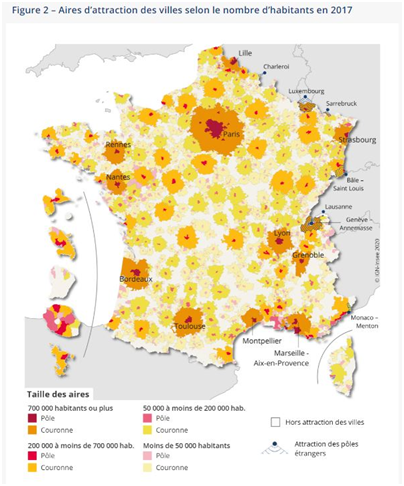

We will create a separate table with 20 distinctive Paris districts and will add spatial coordinates to each postal code.

In [6]:
data = {'District_Name': ['Louvre', 'Bourse', 'Temple', 'Hôtel de Ville', 'Panthéon', 'Luxembourg', 'Palais Bourbon', 'Elysée', 'Opéra', 'Enclos Saint Laurent', 'Popincourt', 'Reuilly', 'Gobelins', 'Observatoire', 'Vaugirard', 'Passy', 'Batignolles Monceau', 'Buttes Montmartre', 'Buttes Chaumont', 'Ménilmontant'],
        'PostalCode':  [75001, 75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020],
    }

paris_data = pd.DataFrame (data, columns = ['District_Name','PostalCode'])

paris_data

,District_Name,PostalCode
0,Louvre,75001
1,Bourse,75002
2,Temple,75003
3,Hôtel de Ville,75004
4,Panthéon,75005
5,Luxembourg,75006
6,Palais Bourbon,75007
7,Elysée,75008
8,Opéra,75009
9,Enclos Saint Laurent,75010


Another table to discover, is the one with the age category. It clearly describes the population categories of Paris. We see that it is composed of two distinctive categories of young people.

In [7]:
html2="https://www.insee.fr/fr/statistiques/2011101?geo=DEP-75#tableau-POP_G2" 
data2  = requests.get(html2).text 
soup2 = BeautifulSoup(data2, 'html5lib')
data2 = soup2.find_all('table')[0]
df2= pd.read_html(str(data2)) 

districts=pd.DataFrame(df2[0]) 
districts.head(20)


,Unnamed: 0,2007,%,2012,%.1,2017,%.2
0,Ensemble,2 193 031,1000,2 240 621,1000,2 187 526,1000
1,0 à 14 ans,314 149,143,323 021,144,303 012,139
2,15 à 29 ans,519 184,237,526 142,235,516 279,236
3,30 à 44 ans,527 708,241,520 739,232,483 824,221
4,45 à 59 ans,414 469,189,409 317,183,403 962,185
5,60 à 74 ans,254 609,116,292 457,131,310 118,142
6,75 ans ou plus,162 912,74,168 946,75,170 331,78


In [8]:
g = geocoder.google('Paris, France')
g.latlng

In [9]:
from geopy.geocoders import Nominatim # converts an address into latitude and longitude values
address = 'Paris, France'
geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris, France are: {}, {}.'.format(latitude, longitude))
paris_data.head()

The geograpical coordinate of Paris, France are: 48.8566969, 2.3514616.


,District_Name,PostalCode
0,Louvre,75001
1,Bourse,75002
2,Temple,75003
3,Hôtel de Ville,75004
4,Panthéon,75005


In [10]:
postal_code = paris_data['PostalCode']

# Using while Statement
latitude = []
longitude = []
n = 0

while n < len(postal_code):
    g = geocoder.arcgis('{}, Paris, France'.format(postal_code[n]))
    lat_lng_coords = g.latlng
    print('Latitude and Longtitude of {} : {}, {}.'.format(postal_code[n], lat_lng_coords[0], lat_lng_coords[1]))
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    n = n + 1

paris_data['Latitude'] = latitude
paris_data['Longitude'] = longitude

paris_data.head()


Latitude and Longtitude of 75001 : 48.86341500000003, 2.3367708860000675.
Latitude and Longtitude of 75002 : 48.86771500000003, 2.3430925840000327.
Latitude and Longtitude of 75003 : 48.86256000000003, 2.3590470010000217.
Latitude and Longtitude of 75004 : 48.85427500000003, 2.3614671030000522.
Latitude and Longtitude of 75005 : 48.84535000000005, 2.35189172500003.
Latitude and Longtitude of 75006 : 48.84926500000006, 2.33209944500004.
Latitude and Longtitude of 75007 : 48.85462000000007, 2.3130611620000536.
Latitude and Longtitude of 75008 : 48.87190500000003, 2.3115702020000413.
Latitude and Longtitude of 75009 : 48.87699500000008, 2.337893106000024.
Latitude and Longtitude of 75010 : 48.87615487100004, 2.3623300000000427.
Latitude and Longtitude of 75011 : 48.85977500000007, 2.378126286000054.
Latitude and Longtitude of 75012 : 48.835120000000074, 2.444956778000062.
Latitude and Longtitude of 75013 : 48.83009000000004, 2.3622827310000503.
Latitude and Longtitude of 75014 : 48.829795

,District_Name,PostalCode,Latitude,Longitude
0,Louvre,75001,48.863415,2.336771
1,Bourse,75002,48.867715,2.343093
2,Temple,75003,48.862560,2.359047
3,Hôtel de Ville,75004,48.854275,2.361467
4,Panthéon,75005,48.845350,2.351892


In [11]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

print('Libraries imported.')


Libraries imported.


In [41]:
! pip install folium==0.5.0  

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Processing /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8/folium-0.5.0-py3-none-any.whl
  Attempting uninstall: folium
    Found existing installation: folium 0.1.0
    Uninstalling folium-0.1.0:
      Successfully uninstalled folium-0.1.0


In [ ]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.13.0             |     pyhd8ed1ab_0          97 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    alsa-lib-1.2.3             |       h516909a_0         560 KB  conda-forge
   

In [42]:
import folium # map rendering library

In [43]:
map1 = folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['PostalCode']):
    
       
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map1)  
    
map1 #a map might not be displayed in a github. to visualize a map, copy a github link and paste it on https://nbviewer.jupyter.org/


In [15]:
# @hiddel_cell
CLIENT_ID = '3NP4QGIZK5BNPSRUUQ4LAKIHPMC40YB14VOZZOORMYCQELSF' # my Foursquare ID
CLIENT_SECRET = 'HDW0QZN5BNSTGTKIDRNQKKZDPDSIE4ITIIFXX2XQ52XDPPLQ' # my Foursquare Secret
VERSION = '20180605'
LIMIT = 30


In [16]:
import json
import requests

#Getting and exploring the first neighborhood in the dataframe.
paris_data.loc[0, 'District_Name']


'Louvre'

In [17]:
#Getting the neighborhood's latitude and longitude values.
neighborhood_latitude = paris_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = paris_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = paris_data.loc[0, 'District_Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))


Latitude and longitude values of Louvre are 48.86341500000003, 2.3367708860000675.


In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=3NP4QGIZK5BNPSRUUQ4LAKIHPMC40YB14VOZZOORMYCQELSF&client_secret=HDW0QZN5BNSTGTKIDRNQKKZDPDSIE4ITIIFXX2XQ52XDPPLQ&v=20180605&ll=48.86341500000003,2.3367708860000675&radius=500&limit=100'

In [20]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '60d04c3b5fe4ab50fea20935'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Palais-Royal',
  'headerFullLocation': 'Palais-Royal, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 94,
  'suggestedBounds': {'ne': {'lat': 48.867915004500034,
    'lng': 2.343598520832485},
   'sw': {'lat': 48.85891499550003, 'lng': 2.32994325116765}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba8b650f964a520f5e839e3',
       'name': 'Jardin du Palais Royal',
       'location': {'address': 'Palais Royal',
        'lat': 48.86494061245833,
        'lng': 2.3377275466918945,
        'labeledLatLngs': [{'label': 'display',
          'lat':

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#cleaning the json and structuring it into a pandas dataframe.

venues = results['response']['groups'][0]['items'] 
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Jardin du Palais Royal,Garden,48.864941,2.337728
1,Palais Royal,Historic Site,48.863236,2.337127
2,La Clef Louvre Paris,Hotel,48.863977,2.336140
3,Thémaé,Spa,48.863589,2.339756
4,Cibus,Italian Restaurant,48.864757,2.335377


In [23]:
#And how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


94 venues were returned by Foursquare.


In [25]:
#creating a function that repeats the same process to all districts in Paris
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#writing the code to run the above function on each neighborhood and create a new dataframe called paris_venues.
paris_venues = getNearbyVenues(names=paris_data['District_Name'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )
paris_venues



Louvre
Bourse
Temple
Hôtel de Ville
Panthéon
Luxembourg
Palais Bourbon
Elysée
Opéra
Enclos Saint Laurent
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles Monceau
Buttes Montmartre
Buttes Chaumont
Ménilmontant


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.863415,2.336771,Jardin du Palais Royal,48.864941,2.337728,Garden
1,Louvre,48.863415,2.336771,Palais Royal,48.863236,2.337127,Historic Site
2,Louvre,48.863415,2.336771,La Clef Louvre Paris,48.863977,2.336140,Hotel
3,Louvre,48.863415,2.336771,Thémaé,48.863589,2.339756,Spa
4,Louvre,48.863415,2.336771,Cibus,48.864757,2.335377,Italian Restaurant
5,Louvre,48.863415,2.336771,Place du Palais Royal,48.862523,2.336688,Plaza
6,Louvre,48.863415,2.336771,Kosyuen 華修園,48.864163,2.333567,Tea Room
7,Louvre,48.863415,2.336771,Place Colette,48.863145,2.335943,Plaza
8,Louvre,48.863415,2.336771,Sanukiya,48.864713,2.333805,Udon Restaurant
9,Louvre,48.863415,2.336771,Le Pot de Vins,48.864322,2.340193,Restaurant


In [26]:
#Let's check how many venues were returned for each neighborhood
paris_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Batignolles Monceau,51,51,51,51,51,51
Bourse,100,100,100,100,100,100
Buttes Chaumont,31,31,31,31,31,31
Buttes Montmartre,37,37,37,37,37,37
Elysée,44,44,44,44,44,44
Enclos Saint Laurent,100,100,100,100,100,100
Gobelins,27,27,27,27,27,27
Hôtel de Ville,100,100,100,100,100,100
Louvre,94,94,94,94,94,94


In [27]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

#Analyzing Each Neighborhood
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

print(paris_onehot.shape)
paris_onehot.head()


There are 191 uniques categories.
(1189, 192)


,Neighborhood,African Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Basque Restaurant,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Trail,Bistro,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burgundian Restaurant,Bus Line,Bus Stop,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doner Restaurant,Donut Shop,EV Charging Station,Electronics Store,Escape Room,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,New American Restaurant,Noodle House,Okonomiyaki Restaurant,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Provençal Restaurant,Pub,Ramen Restaurant,Recreation Center,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Snack Place,South American Restaurant,Southwestern French Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [65]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
print(paris_grouped.shape)
paris_grouped


(20, 188)


,Neighborhood,African Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Basque Restaurant,Beer Bar,Beer Garden,Beer Store,Bike Trail,Bistro,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burgundian Restaurant,Bus Line,Bus Stop,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Electronics Store,Escape Room,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hawaiian Restaurant,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,New American Restaurant,Noodle House,Okonomiyaki Restaurant,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Provençal Restaurant,Pub,Ramen Restaurant,Recreation Center,Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shop & Service,Shopping Mall,Snack Place,South American Restaurant,Southwestern French Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo Exhibit
0,Batignolles Monceau,0.00,0.00,0.000000,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000,0.038462,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.019231,0.00,0.000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.019231,0.019231,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.019231,0.000000,0.00,0.00,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.211538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.134615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.076923,0.076923,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.019231,0.00,0.00,0.000000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.000,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.00,0.00,0.000000,0.019231,0.000000,0.057692,0.000000,0.00,0.00,0.00000

In [28]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Batignolles Monceau----
                 venue  freq
0    French Restaurant  0.24
1                Hotel  0.14
2  Japanese Restaurant  0.06
3                Plaza  0.04
4                 Café  0.04


----Bourse----
                venue  freq
0   French Restaurant  0.12
1              Bakery  0.06
2        Cocktail Bar  0.05
3            Wine Bar  0.05
4  Italian Restaurant  0.04


----Buttes Chaumont----
               venue  freq
0  French Restaurant  0.23
1        Supermarket  0.06
2             Bistro  0.03
3              Hotel  0.03
4                Spa  0.03


----Buttes Montmartre----
                venue  freq
0   French Restaurant  0.24
1                 Bar  0.08
2              Bistro  0.05
3          Restaurant  0.05
4  Italian Restaurant  0.05


----Elysée----
                venue  freq
0   French Restaurant  0.20
1               Hotel  0.18
2  Italian Restaurant  0.05
3      Cosmetics Shop  0.05
4              Bakery  0.05


----Enclos Saint Laurent----
             

In [29]:
#Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
#Now let's create the new dataframe and display the top 5 venues for each neighborhood.
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted
 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Batignolles Monceau,French Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Café
1,Bourse,French Restaurant,Bakery,Wine Bar,Cocktail Bar,Italian Restaurant
2,Buttes Chaumont,French Restaurant,Supermarket,Concert Hall,Beer Garden,Scenic Lookout
3,Buttes Montmartre,French Restaurant,Bar,Italian Restaurant,Vietnamese Restaurant,Bistro
4,Elysée,French Restaurant,Hotel,Italian Restaurant,Cosmetics Shop,Bar
5,Enclos Saint Laurent,French Restaurant,Hotel,Bistro,Coffee Shop,Bar
6,Gobelins,Vietnamese Restaurant,French Restaurant,Thai Restaurant,Hotel,Chinese Restaurant
7,Hôtel de Ville,French Restaurant,Hotel,Ice Cream Shop,Italian Restaurant,Wine Bar
8,Louvre,French Restaurant,Japanese Restaurant,Plaza,Hotel,Restaurant
9,Luxembourg,French Restaurant,Italian Restaurant,Hotel,Chocolate Shop,Fountain


In [30]:
#Clustering neighborhoods. Run k-means to cluster the neighborhood into 5 clusters. set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 3, 1, 4, 1, 1],
      dtype=int32)

In [31]:
#Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood. add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_data.iloc[:,:] 

# merge toronto_grouped with df to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District_Name')

paris_merged.head() # check the last columns! 

,District_Name,PostalCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Louvre,75001,48.863415,2.336771,1,French Restaurant,Japanese Restaurant,Plaza,Hotel,Restaurant
1,Bourse,75002,48.867715,2.343093,1,French Restaurant,Bakery,Wine Bar,Cocktail Bar,Italian Restaurant
2,Temple,75003,48.862560,2.359047,1,French Restaurant,Art Gallery,Bakery,Coffee Shop,Sandwich Place
3,Hôtel de Ville,75004,48.854275,2.361467,1,French Restaurant,Hotel,Ice Cream Shop,Italian Restaurant,Wine Bar
4,Panthéon,75005,48.845350,2.351892,1,French Restaurant,Bar,Hotel,Italian Restaurant,Wine Bar


In [34]:
#Finally, let's visualize the resulting clusters. create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
%matplotlib inline
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
        
markers_colors = []
for lat, lon, label, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['District_Name'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(label) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1], 
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters #a map might not be displayed in a github. to visualize a map, copy a github link and paste it on https://nbviewer.jupyter.org/


One of the useful French platforms, which can give us interesting information is www.seloger.com. This website proposes different real estate announcements. In section 'Sales' and "Rentals", 
we can find the estimations based on real transacations. We can find a property price per sqm in a specific area for both rentals and sales. It goes even further and proposes the profitability rate 
and suggestions for investments. 

The dataframe below shows us once again that our opinion is correct. Based on sales and real rental demand, we can see the income of an investment in each district of Paris. 
With an example of investing in a studio apartment, we see that the highest income would be in the 9th and 10th districts. 

In [33]:
html3="https://edito.seloger.com/actualites/villes/quelle-rentabilite-locative-pour-un-studio-paris-par-arrondissement-article-32161.html" 
data3  = requests.get(html3).text 
soup3 = BeautifulSoup(data3, 'html5lib')
data3 = soup.find_all('table')[0]
df3= pd.read_html(str(data3)) 

districts2=pd.DataFrame(df3[0]) 
districts2.head(20)
 

print('The highest income would be in the 9th and 10th districts.')

The highest income would be in the 9th and 10th districts.


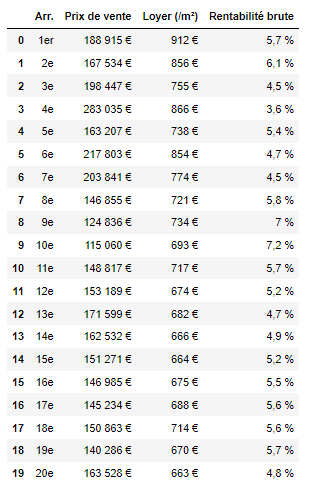

### 5.	DISCUSSIONS : 

In France, nine out of ten people live in a functional area. 

The functional area of a city defines the extent of its influence on the surrounding municipalities. In France, the 699 functional areas are homes to over nice out of ten people : 51% of the French population lives in centers and 43% in commuting areas. One out of five lives in the Paris functional area. 

Between 2007 and 2017, the population grew considerably in functional areas with 700,000+ inhabitants. Since 2012, the population has stabilized in areas with fewer than 50,000 inhabitants and in municipalities outised of functional areas. Within functional areas, population growth is slower in central municipalities than in commuting areas. (Source : Insee – 21/10/2020 https://www.insee.fr/en/statistiques/5209514 )

Above we have discussed the age category of population in Paris with the biggest percentage. We assumed that a big city proposes educational and professional oportunities for young people and middle age professionals. Therefore, it attracts these two categories which are mostly concentrated in a big city. 

Going back to our two age categories,  we analyze that young inhabitants enter into their professional life, therefore the suitable offer for them would be renting a studio apartment or a one-bedroom flat. 


### 6.	CONCLUSION : 

From the tables above and our analysis, we can justify our opinion. The best investment is in a busy and functional area. Most of opportunities will be found in big cities with active professional, university or tourist life. Even though the sale prices are higher than in smaller towns but the income will be constant. 
Several options can be proposed : 

-	Real estate investment  in highly and densely populated areas. These areas are perfect for long-term rentals because of a high demand for housing.
-	Real estate investment in areas popular with tourists. It concerns the downtown with animated districts. These area are perfect for short-term rentals or Airbnb and which can generate maximum of profit. The disadvantage is that it’s not contstant. 
-	Real estate investment combining the two options long-term and short-term rentals. Buying a small apartment can generate good income when proposing it to a student during the year and Airbnb during the summer period. 

Nevetheless, in spite of all the analysis done, we observe a new phenomene nowadays. As a result of the Covid-19 pandemic and remote work, many people decide to leave the big cities and prefer renting or buying real estate in a countryside. This is a good compromise for those who find a solution to this worldwide problem. For the price of a studio apartment in Paris, they can afford a spacious flat or even a house with a garden.       
I am more than convinced that buying a property is still a good solution for investment. The temporary crises will be replaced by different solutions but the demand for housing will always remain active.  


### 7.	REFERENCES : 

INSEE : https://www.insee.fr/
SELOGER : https://www.seloger.com/
FOURSQUARE : https://foursquare.com/
OPENDATA : https://www.data.gouv.fr/
WIKIPEDIA : https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Accueil_principal

###### June 21, 2021